In [8]:
import io # for storing uploaded dataset in pandas
import pandas as pd # for data manipulation
import numpy as np # for mathematical operations
import matplotlib.pyplot as matplot # for plotting points in graph
import math
from matplotlib import cm # colormap related utilites for plotting points in graph
from mpl_toolkits.mplot3d import Axes3D # required for drawing 3D objects
from google.colab import files
from google.colab import drive
import random
from pandas import DataFrame
from operator import itemgetter # for sorting

In [9]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/My_Colab_Notebook/Pattern Recognition/Assignments/assignment_4/data_k_mean.txt'
training_file = pd.read_csv(file_path, sep=" " , header = None, dtype = 'float64', engine='python')
training_file = np.array(training_file)
print(training_file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[[-7.87157 -4.86573]
 [-4.76661 -6.87944]
 [-6.67986 -5.8308 ]
 ...
 [ 6.91832 -0.32132]
 [-8.23828 -4.00405]
 [-5.75112 -5.99531]]


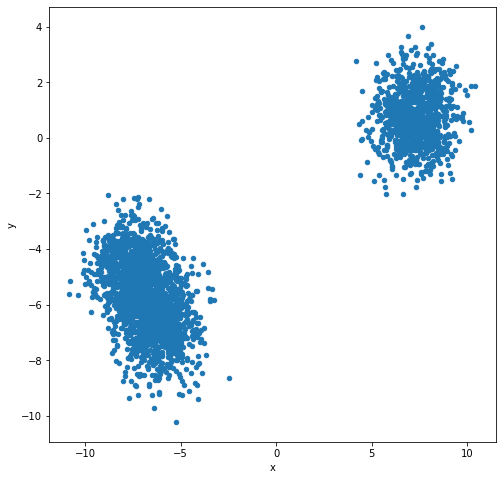

In [10]:
df = DataFrame(dict(x=training_file[:,0],y=training_file[:,1]))
fig,ax = matplot.subplots(figsize = (8,8))
df.plot(ax=ax, kind = 'scatter',x='x',y='y')
matplot.xlabel('x')
matplot.ylabel('y')
matplot.show()

In [11]:
k = 2

In [12]:
centroid = []
for i in range(k):
    a = []
    a.append(training_file[i][0])
    a.append(training_file[i][1])
    centroid.append(a)
centroid = np.array(centroid)
print(centroid)

[[-7.87157 -4.86573]
 [-4.76661 -6.87944]]


In [13]:
total = []
for i in range(training_file.shape[0]):
    temp = []
    centroid_a = 2147483647
    centroid_b = ''
    for j in range(centroid.shape[0]):
        a = math.sqrt((training_file[i][0]- centroid[j][0])**2 + (training_file[i][1]- centroid[j][1])**2)
        b = 'c' + str(j)
        if a < centroid_a:
            centroid_a = a
            centroid_b = b
    temp.append(training_file[i][0])
    temp.append(training_file[i][1])
    temp.append(centroid_b)
    total.append(temp)
print(temp)

[-5.751119999999999, -5.99531, 'c1']


In [14]:
while True:
    flag = 0
    for i in range(k):
        x = 0
        y = 0
        s = 'c'+str(i)
        cnt = 0
        for j in range(training_file.shape[0]):
            if total[j][2] == s:
                cnt = cnt + 1
                x = x + total[j][0]
                y = y + total[j][1]
        
        centroid[i][0] = x / cnt
        centroid[i][1] = y / cnt
        
    for i in range(training_file.shape[0]):
        centroid_a = 2147483647
        centroid_b = ''
        for j in range(centroid.shape[0]):
            a = math.sqrt((total[i][0]- centroid[j][0])**2 + (total[i][1]- centroid[j][1])**2)
            b = 'c' + str(j)
            if a < centroid_a:
                centroid_a = a
                centroid_b = b
        if centroid_b != total[i][2]:
            total[i][2] = centroid_b
            flag  = 1
    if flag == 0:
        break
      

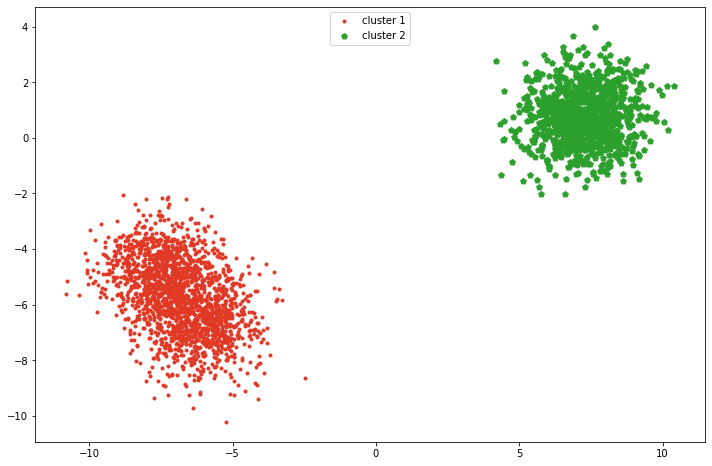

In [15]:
color=['#e03926','#2ca02c','#ff7f0e','#d62728','m','y','k','#0eeabf','#9467bd','#8c564b','#e377c2','#bcbd22']
marker=['.','p','s','^','s','v','+','D','X','P','2','H','3','d','4','5','6','7','8','9','10','11']
f, ax = matplot.subplots()
f.set_figheight(8)
f.set_figwidth(12)
for i in range(k):
    s = 'c'+str(i)
    plotingList = []
    for j in range(training_file.shape[0]):
        if total[j][2] == s:
            a = []
            a.append(total[j][0])
            a.append(total[j][1])
            plotingList.append(a)
    cluster = 'cluster ' + str(i + 1)
    plotingList = np.array(plotingList)
    ax.scatter(plotingList[:,0],plotingList[:,1],marker=marker[i],color=color[i],label=cluster )

ax.legend(loc='upper center')
matplot.show()